<a href="https://colab.research.google.com/github/ZemelakGoraga/image_classification/blob/main/food_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Import necessary libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam

In [8]:
# from the Kaggle account settings page.
from google.colab import files
files.upload() # here the downloded kaggle.json file is imported#

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"zemelakgoraga","key":"9bcb68625f661266080d1c6be3de4b4b"}'}

In [9]:
# Next
# Next, install the Kaggle API client.
!pip install -q kaggle

# Next
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json


# Next

# List a given datasets

#!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset

## Forcefully download the dataset using Kaggle CLI
!kaggle datasets download -d harishkumardatalab/food-image-classification-dataset --force


100% 1.68G/1.68G [00:57<00:00, 39.9MB/s]
100% 1.68G/1.68G [00:58<00:00, 31.1MB/s]


In [ ]:
#unzip the different data files
# There is one .csv file in the following zip file

import zipfile

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/food-image-classification-dataset.zip"

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Get the list of file paths within the ZIP archive
    file_paths = zip_ref.namelist()

# Print the list of file paths
for path in file_paths:
    print(path)

In [10]:
import zipfile
import os

# Specify the path to the downloaded ZIP file
zip_file_path = "/content/food-image-classification-dataset.zip"

# Specify the directory where you want to extract the files
extraction_dir = "foodimage"  # Change this to your desired extraction directory

# Create a ZipFile object
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents of the ZIP archive to the specified directory
    zip_ref.extractall(extraction_dir)

# Print the directory where the files are extracted
print("Files extracted to:", os.path.abspath(extraction_dir))


Files extracted to: /content/foodimage/foodimage


In [11]:
import os

# Specify the root directory path
root_directory = "/content/foodimage"

# Change the current working directory to the root directory
os.chdir(root_directory)

# Now the current working directory is the root directory


In [12]:
# know the directory, in this project case, the directory is 'Food Classification dataset'
!ls

'Food Classification dataset'   food-image-classification-dataset.zip
 foodimage		        kaggle.json


In [13]:


# Define the dataset directory
dataset_dir = 'Food Classification dataset'

In [14]:
# Data preprocessing
image_size = (224, 224)

class_names = os.listdir(dataset_dir)
num_classes = len(class_names)

images = []
labels = []

for class_name in class_names:
    class_dir = os.path.join(dataset_dir, class_name)
    for image_name in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_name)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        image = cv2.resize(image, image_size)
        images.append(image)
        labels.append(class_name)

X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    rescale=1.0/255.0
)

datagen.fit(X_train)


In [15]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (19098, 224, 224, 3)
y_train shape: (19098,)


In [16]:

# Build a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])



In [ ]:
import numpy as np
import tensorflow as tf

# Assuming your y_train and y_test are currently in string format
# Convert labels to integers
label_to_idx = {label: idx for idx, label in enumerate(np.unique(y_train))}
y_train = np.array([label_to_idx[label] for label in y_train])
y_test = np.array([label_to_idx[label] for label in y_test])

# Cast labels to tf.int32
y_train = tf.cast(y_train, tf.int32)
y_test = tf.cast(y_test, tf.int32)

# Train the model
history = model.fit(datagen.flow(X_train, y_train, batch_size=32),
                    epochs=2,
                    validation_data=(X_test, y_test))

In [17]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')


150/150 [==============================] - 37s 244ms/step - loss: 322.4842 - accuracy: 0.0928
Test loss: 322.4842
Test accuracy: 0.0928


150/150 [==============================] - 38s 252ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       287
           1       0.09      0.04      0.06       308
           2       0.16      0.74      0.26       281
           3       0.38      0.07      0.12       321
           4       0.15      0.08      0.10       289
           5       0.00      0.00      0.00       295
           6       0.10      0.19      0.13       293
           7       0.00      0.00      0.00       290
           8       0.00      0.00      0.00       206
           9       0.00      0.00      0.00        61
          10       0.00      0.00      0.00        57
          11       0.00      0.00      0.00        73
          12       0.00      0.00      0.00        67
          13       0.81      0.06      0.11       230
          14       0.00      0.00      0.00       203
          15       0.00      0.00      0.00        77
          16       0.00

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


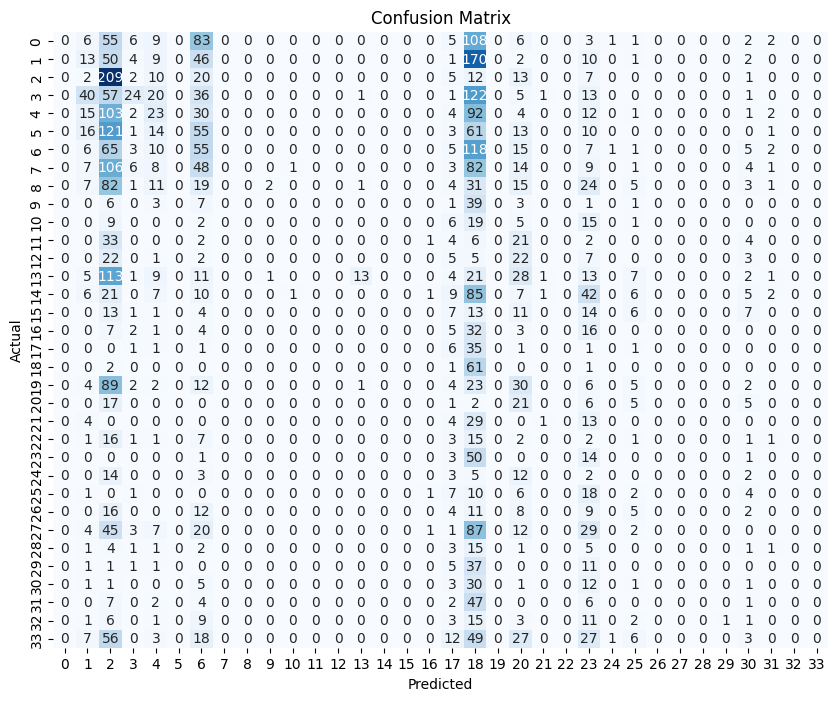

In [23]:
import seaborn as sns  # Add this import at the top

# Rest of your code

# Classification report and confusion matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [24]:
from tensorflow.keras.models import save_model

# ... (Previous code for model training)

# Save the trained model to a file
model.save('trained_model.h5')

# You can also save the model in a different format (e.g., SavedModel format)
# model.save('saved_model', save_format='tf')

print("Model saved successfully.")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully.


In [ ]:
# Import necessary libraries
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

# Load your preprocessed X_train, y_train, X_test, y_test

# Preprocess the data (normalize pixel values)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Create a MobileNetV2 base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Build a transfer learning model on top of the base model
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
batch_size = 32
epochs = 1

model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Transfer Learning Model - Test Accuracy:", accuracy)


In [ ]:
model_tl.compile(optimizer=Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Data preprocessing for transfer learning
# Load images, resize to (224, 224), and normalize
# Split into training and testing sets

# Train the transfer learning model

# Evaluate the transfer learning model

# Save and export the models for future use

# Hypotheses and questions
# 1. Are certain classes more accurately predicted than others?
# 2. How does the addition of data augmentation affect model performance?
# 3. Does the transfer learning model outperform the CNN model in terms of accuracy?

# Data analysis and visualization to answer the hypotheses
# Analyze class-wise accuracy
# Compare performance metrics of the CNN model with and without data augmentation
# Compare performance metrics of the CNN model and the transfer learning model

# Visualize the results

In [ ]:
df.head()